# Artificial Intelligence and Machine Learning in Physics

## Machine Learning

## Neural Networks

What follows has been adapted from https://neuralnetworksanddeeplearning.com/chap1.html by Michael Nielsen and the PyTorch examples found here: https://brsoff.github.io/tutorials/beginner/pytorch_with_examples.html. Additional material has been taken from https://arxiv.org/pdf/2505.13042, by de Miranda, de Lima and de S. Farias. 

### The Theory of Neural Networks

You can think of a neural network as a nonlinear function of many variables that depends on many parameters. One way to represent neural networks looks like the diagram below, with each blob representing a neuron in the network. In the network shown below, each neuron in the network provides a weighted input into the next layer of neurons. 

```{figure} NNexample.png
:width: 50%
:align: center
:class: dark-light
An example of neural network: the input layer is shown, as well as several hidden layers, and the output layer.
```

Considering the simple example below, the output of the three neurons in the input layer $\ell=0$ (taken to be identical as the input parameters), $a^0_k$, for $k=1,2,3$, provide a weighted input into the second layer $\ell=1$: $z^1_1 = \sum_k w_{1k}^1 a^0_k + b_1^1$. The output of the second layer is then $a^1_1 = \sigma(z^1_1)$, where $\sigma(z)$ represents the activation function. We will understand how all of this works in this chapter.

```{figure} NNexample2.png
:width: 50%
:align: center
:class: dark-light
An example of a simple neural network: the input layer is shown, as well as a single neuron in the next layer.
```

### Perceptrons 

It is simpler to start by considering what are known as perceptrons. A perceptron takes as input binary inputs $x_1, x_2, \dots$, and produces a single binary output. As an example, consider three binary inputs $x_1, x_2, x_3$: 

```{figure} perceptron1.png
:width: 50%
:align: center
:class: dark-light
An example of a perceptron with three inputs.
```

The weights $w_1, w_2, w_3$ express the importance of respective inputs to the output. The output is binary: it can be either 0 or 1. This output is determined by whether the weighted sum, $\sum_j w_j x_j$ is less than or greater than some threshold value $\theta$, a real number which is a parameter of the output neuron. We can express the output, $y$ mathematically as:

$$
y =
\begin{cases}
0, & \mathrm{if}~\sum_j w_j x_j \leq \theta,\\
1, & \mathrm{if}~\sum_j w_j x_j > \theta~.
\end{cases}
$$

Let's consider a specific example for simplicity. Suppose you are deciding whether to take an elective course in [High Energy Magic](https://wiki.lspace.org/High_Energy_Magic_Building) (MAGIC 3500K). There are three factors that will help you decide:

1. Do you like the subject? ($x_1 = 1$ if yes, $x_1=0$ if not),
2. Is the instructor highly rated on RateMyWizard.com? ($x_2 = 1$ if highly rated, $x_2 = 0$ if not), and
3. Are any of your friends also taking the course? ($x_3 = 1$ if yes, $x_3 = 0$ if not).

Each factor weighs differently in your decision $y$. Let's suppose you are very interested in learning the fundamentals of High Energy Magic, therefore you assign a weight $w_1 = 0.6$ to the first factor. You weigh the instructor rating on RateMyWizard.com as $w_2 = 0.2$, and whether any of your friends are also taking the course $w_3 = 0.2$. If you now choose a threshold of $\theta = 0.5$, say, you would end up only taking the course only if you like the subject, whereas the second and third factors would be irrelevant. If you choose the threshold to be $\theta=0.3$, however, you could take the course if the instructor is highly rated and some of your friends are taking the course, or if you just like the subject. 

We can simplify things by moving the threshold to the right-hand side of the equality and instead write, defining the bias, $b\equiv-\theta$:

$$
y =
\begin{cases}
0, & \mathrm{if}~\sum_j w_j x_j + b \leq 0,\\
1, & \mathrm{if}~\sum_j w_j x_j + b > 0~.
\end{cases}
$$

The bias $b$ represents how easy it is to get the perceptron to output 1. In biological terms, this would represent how easy it is to get the perceptron to "fire". 

Suppose now that we have a network of perceptrons that we would like to train to learn how to solve a particular problem. For example, the inputs to the network could be identified photos of cats or dogs, converted into raw pixel data. We would like the network to learn the weights and biases so that the network correctly identifies an arbitrary photo as a cat or a dog. Suppose we make a small variation in some weight (or bias) in the network. We would like this small variation to cause only a small corresponding change in the output. If we write the weights and biases in terms of a vector $\bf{w} = (w_1, w_2, w_3)$, then we want small changes of the form $\bf{w} \to \bf w + \Delta w$ to cause a small change in the output $y + \Delta y$. We could then use this to modify weights and biases to get our network to behave in the way that we want, e.g. via some optimization procedure (we will do this later). 

Unfortunately, small changes in weights and biases of a single perceptron in the network can sometimes cause the output of a perceptron to flip, e.g. from 0 to 1. This may cause the behavior of the rest of the network to change completely in some complicated way. 

We can overcome this problem by introducing a new type of artificial neuron, which we call sigmoid neuron, which we turn to next. 

### Sigmoid Neurons 

A sigmoid neuron is very similar to a perceptron, with the difference being that its output is not constrained to be 0 or 1; instead it is $\sigma(\mathbf{w} \cdot \mathbf{x} + b)$. In this case, $\sigma$ is a continuous function that interpolates between 0 and 1. Two frequently used examples are the sigmoid function:

$$
\sigma(z) = \frac{1}{1 + \exp{-z}}\;,
$$ 

or the Rectified Linear Unit (ReLU) function:

$$
\mathrm{ReLU}(z)
\begin{cases}
0, & \mathrm{if}~z\leq 0,\\
z, & \mathrm{if}~z> 0~.
\end{cases}
$$ 
which can also be written as $\mathrm{ReLU}(z) = \max(0,z)$.

In this case we get for the change in the output: 

$$
\Delta y \simeq \sum_j \frac{ \partial y } {\partial w_j} \Delta w_j  + \frac{ \partial y } {\partial b} \Delta b\;.
$$

The architecture of neural networks was shown in Figure 1. There is generally an input layer, several hidden layers and an output layer. Sometimes such networks are known as "multilayer perceptrons" (MLPs). The design of the neural network is a form of art, that requires heuristic arguments. 

### Gradient Descent 

Suppose we have a training input $\mathbf{x}$ of dimension $D_\mathrm{in}$ that generates an output $\mathbf{y}$ of dimension $D_\mathrm{out}$. For example $\mathbf{x}$ could represent each of the pixels in a photo of a dog or a cat, and $\mathbf{y}$ could be appropriately chosen to tell us whether the particular photo is that of a dog or a cat. In this case, e.g. $\mathbf{y} = (y_1, y_2)$ is the output, and we could choose $\mathbf{y} = (1,0)$ to represent a dog and $\mathbf{y} = (0,1)$ to represent a cat. 

Our goal is to find the appropriate weights and biases of the network, $\mathbf{w}$ and $\mathbf{b}$, respectively, such that the network yields the correct $\mathbf{y}(\mathbf{x})$ for a given (known) set of $\mathbf{x}$. E.g. if we input a picture of a dog, then we want the *predicted* value, i.e. the output of the network, $\mathbf{a}$ to be $\mathbf{a}=(1,0)$. 

How well we are achieving this can be quantified by the "loss" or "cost" function, $C(\mathbf{w}, \mathbf{b})$. If we have several inputs $\mathbf{x}$, each represented by a vector $\mathbf{x}_i$, then an appropriate function could the the *quadratic loss*:

$$
C(\mathbf{w}, \mathbf{b}) = \sum_i \sum_j (y_j(\mathbf{x}_i) - a_{i,j})^2\;,
$$
where the sum over $i$ is over the (vector) of inputs and $j$ is over the length of the output. E.g. if we have 100 photos of cats or dogs as input, then $i = 1, 2,\dots, 100$ and $j=1,2$. 

This is a non-negative function that becomes small when the $y_j(\mathbf{x}_i)$ approximately equal the outputs $a_{i,j}$ for all training inputs $\mathbf{x}_i$.

The aim of the training algorithm is to dtermine the weights $\mathbf{w}$ and biases $\mathbf{b}$ that minimize $C(\mathbf{w}, \mathbf{b})$. 

To achieve this, we use the gradient descent algorithm, [originally attributed to Cauchy in 1847](https://web.archive.org/web/20181229073335/https://www.math.uni-bielefeld.de/documenta/vol-ismp/40_lemarechal-claude.pdf) (!). 

The algorithm proceeds as follows: consider the minimization of $C(\mathbf{v})$ over a two-dimensional vector $\mathbf{v} = (v_1, v_2)$. Then we can write:

$$
\Delta C \approx \frac{ \partial C} { \partial v_1 } \Delta v_1 + \frac{ \partial C} { \partial v_2 } \Delta v_2\;,
$$ 

with equality in the limit of infinitesimals. This can be written as: 

$$
\Delta C \approx \nabla C \cdot \Delta \mathbf{v}\;,
$$
with the gradient of $C$ defined as usual: $\nabla C = \left(  \frac{ \partial C} { \partial v_1 }, \frac{ \partial C} { \partial v_2 } \right)$.

The goal is then to find, at a particular $(v_1, v_2)$, the direction in which to move, such that $\Delta C$ is negative, such that $C \to C + \Delta C$ causes a decrease. It's easy to see that at any point $(v_1, v_2)$, this is given by $-\nabla C$:

Consider moving in arbitrary direction represented by a unit vector $\mathbf{u}$ from that point. Then $\Delta C = \nabla C \cdot \mathbf{u} = |\nabla C| |\mathbf{u}| \cos \theta$, where $\theta$ is the angle between the two vectors $\nabla C$ and $\mathbf{u}$. Then $\Delta C$ is clearly maximized when $\mathbf{u}||\nabla C$ (i.e. $\cos \theta = 1$), and therefore $\nabla C$ represents the direction of maximum increase, and $-\nabla C$ the direction of maximum *decrease*. 

So to move in the direction of decreasing loss function $C$, we choose $\Delta \mathbf{v} = - \eta \nabla C$, where $\eta$ is a small positive parameter. In the context of neural network optimization, the parameter $\eta$ is known as the learning rate. 

In the case of neural networks, the algorithm applies verbatim: what we need to find is the gradient of the loss function $C$ with respect to the weights $\mathbf{w}$ and biases $\mathbf{b}$. We then update the weights and biases proportional to minus the learning rate:

$$
\begin{aligned}
\mathbf{w} \to \mathbf{w}' &= \mathbf{w} - \eta \frac{ \partial C } { \partial \mathbf{w} }\\
\mathbf{b} \to \mathbf{b}' &= \mathbf{b} - \eta \frac{ \partial C } { \partial \mathbf{b} }\;.
\end{aligned}
$$

We will apply this algorithm concretely in the next section, first in the general case, and then in a simple network, for which we will present our first code. 

### Training a Neural Network with Backpropagation

Consider layers labeled by $\ell$, each with neurons labeled by $j$. The weight from neuron $k$ in layer $\ell-1$ to neuron $j$ in layer $\ell$ is $w^\ell_{kj}$. Each $j$-th neuron in the $\ell$-th layer has an associated bias $b^\ell_j$. 

Then the total input (pre-activation) to neuron $j$ in the $\ell$-th layer is:

$$
z^\ell_j = \sum_k  a^{\ell-1}_k w^\ell_{kj} + b^\ell_j\;,
$$

where $a^\ell_j = \sigma(z^\ell_j)$ is the activation and $\sigma$ is the activation function. In vector form, useful for code implementation, this would look like:

$$
\mathbf{z}^\ell = \mathbf{a}^{\ell-1} \cdot \mathbf{w}^\ell + \mathbf{b}\;,
$$

where we note that the dot product in this case is non-commutative since $\mathbf{a}$ and $\mathbf{w}$ are matrices in general.


The inputs to layer $\ell=1$ are just the input features associated with the training examples, which we will call $x$. If there are $N$ training examples, each represented by $D_\mathrm{in}$ input features, then $x$ is an $N \times D_\mathrm{in}$ matrix. We also know the associated output values for each of these examples, $y$. If the expected output for a single example has dimension $D_\mathrm{out}$, then $y$ is an $N \times D_\mathrm{out}$ matrix. 

We want to optimize a "loss" (or "cost") function $C$ using the gradient descent algorithm. For the sake of simplicity, let's pick $C$ to be the sum of squared errors of the prediction:

$$
C = \sum_{i=1}^N \sum_{j=1}^{D_\mathrm{out}} (y_{\mathrm{pred},ij} - y_{ij})^2 = \sum_{i=1}^N C^i \;,
$$

where $y_{\mathrm{pred},ij}$ is the output of the neural network for the $i$-th training example, and $C^i =  \sum_{j=1}^{D_\mathrm{out}} (y_{\mathrm{pred},ij} - y_{ij})^2$ corresponds to a single training example. To apply gradient descent, we need to find:

$$
\nabla C^i = \left\{\frac{ \partial C^i}{ \partial w^\ell_{kj} }, \frac{ \partial C^i}{ \partial b^\ell_{j} } \right\}^L_{\ell=2}\;,
$$

for all layers $\ell = 2, 3,..., L$ and for all $i, j,k$. 


Next we assume a network with hidden layers $\ell=2,\dots,L-1$ of widths $H_1,H_2,\dots$.


We now concentrate on a single training example $i$ and suppress the index $i$ on all quantities so that $C^i\to C$, $a^{\ell,i}_j\to a^\ell_j$, $z^{\ell,i}_j\to z^\ell_j$, $y_{ij}\to y_j$. 
Consider then the following quantity:
$$
\begin{aligned}
\Delta C_j^\ell &= \frac{ \partial C}{ \partial z^\ell_{j}} \\
                    &= \sum_k \frac{ \partial C}{ \partial a^\ell_k} \frac{ \partial a^\ell_k}{ \partial z^\ell_j}\;,
\end{aligned}
$$

where we have used the chain rule to generate the sum over the $k$ neurons in the layer. But since $a^\ell_k = \sigma(z^\ell_k)$, the only terms in the sum that contribute are those with $k=j$ and therefore:

$$
\Delta C_j^\ell = \frac{ \partial C}{ \partial a^\ell_j} \frac{ \partial a^\ell_j}{ \partial z^\ell_j}
$$

or:

$$
\Delta C_j^\ell = \frac{ \partial C}{ \partial a^\ell_j} \frac{ \partial \sigma}{ \partial z^\ell_j}\;.
$$

Then the components of the gradient with respect to the weights are:

$$
\begin{aligned}
\frac{ \partial C}{ \partial w^\ell_{kj}} &= \frac{ \partial C}{ \partial z^\ell_j} \frac{ \partial z^\ell_j}{ \partial w^\ell_{kj}} \\
&= a^{\ell-1}_k\;\Delta C^\ell_j \;,
\end{aligned}
$$

and

$$
\begin{aligned}
\frac{ \partial C}{ \partial b^\ell_{j}} &= \frac{ \partial C}{ \partial z^\ell_j} \frac{ \partial z^\ell_j}{ \partial b^\ell_{j}} \\
&= \Delta C^\ell_j\;.
\end{aligned}
$$

To obtain the components of the gradient at all layers, we need to relate $\Delta C^\ell_j$ to the one in the next layer, $\Delta C^{\ell+1}_k$. We do this by noting that:

$$
\begin{aligned}
\Delta C^\ell_j &= \frac{ \partial C } { \partial z^\ell _j } \\
&=\sum_k \frac{ \partial C }{\partial z^{\ell+1}_k } \frac{\partial   z^{\ell+1}_k } { \partial z^\ell_j}\\
&= \sum_k \Delta C^{\ell+1}_k \frac{\partial z^{\ell+1}_k } {\partial z^\ell_j}\;,
\end{aligned}
$$

and since 

$$
z^{\ell + 1}_k = \sum_j  a^\ell _j w^{\ell+1}_{jk} + b^{\ell+1}_k = \sum_j  \sigma(z^\ell _j) w^{\ell+1}_{jk}+ b^{\ell+1}_k\;,
$$

we obtain: 

$$
\frac{\partial z^{\ell+1}_k } {\partial z^\ell_j} = w^{\ell+1}_{jk} \frac{\partial \sigma}{\partial z^\ell_j}\;.
$$

Putting the expressions together, we obtain the desired backpropagation expression, for $\Delta C^\ell_j$ in the previous layer, to the one in the next, $\Delta C^{\ell+1}_k$ :

$$
\Delta C^\ell_j = \sum_k  \Delta C^{\ell+1}_k w^{\ell+1}_{jk} \frac{\partial \sigma}{\partial z^\ell_j}\;.
$$

In vector form:


$$
\mathbf{\Delta C}^\ell = \mathbf{\Delta C}^{\ell+1} \cdot (\mathbf{w}^{\ell+1})^T \odot \frac{\partial \sigma}{\partial z^\ell_j}\;,
$$

where the $\odot$ represents the so-called Hadamard or Schur product. Note that in python the matrix product is simply obtained by using ```a.dot(b)```, whereas the Schur product by using the ```*``` operator: ```a*b```. 


To start off the backpropagation, we need the value $\Delta C^L_j$ in the last layer. This is easily obtained as:

$$
\Delta C^L_j = \frac{ \partial C } { \partial a^L_j } \frac{ \partial \sigma } { \partial z_j^L}\;.
$$

In many regression settings the output activation is the identity, so $\frac{ \partial \sigma } { \partial z_j^L} = 1$.

For the choice of loss function $C =  \sum_{j=1}^{D_\mathrm{out}} (y_{\mathrm{pred},j} - y_j)^2$, and identity activation for the last layer then:

$$
\Delta C^L_j = 2 (a^L_j - y_j)\;,
$$

since $y_{\mathrm{pred},j} = a^L_j$. 

Since the loss function is a sum over all the training samples, we need to reinstate the sample index $i$ to get: 

$$
\frac{ \partial C}{ \partial w^\ell_{kj}} = \sum_i \frac{ \partial C^i}{ \partial w^\ell_{kj}} = \sum_i a^{i,\ell-1}_k\;\Delta C^{i,\ell}_{j} \;,
$$

and:

$$
\frac{ \partial C}{ \partial b^\ell_{j}} = \frac{ \partial C^i}{ \partial b^\ell_{j}} = \sum_i \Delta C^{i,\ell}_j\;.
$$

where the sum is over the trainng samples $i$. The first equation is easily written in vector form: 

$$
\mathbf{\nabla C}_{\mathbf{w}^\ell} =  (\mathbf{a}^{\ell-1})^T\cdot \mathbf{\Delta C}^{\ell} \;.
$$

### Training a Simple Neural Network using NumPy

Let's write down the necessary equations and outline the procedure for training a simple neural network, with one hidden layer. We will create $N=64$ training samples $\mathbf{x}$ of dimension $D_\mathrm{in}=1000$ each, and with outputs $\mathbf{y}$, with dimension $D_\mathrm{out}=10$. Therefore, the matrix $\mathbf{x}$ will have dimension $N\times D_\mathrm{in} = 64 \times 1000$ and $\mathbf{y}$ will have dimensions $N \times D_\mathrm{out}=64 \times 10$. 

The hidden layer will have dimension $H=100$. Therefore the weights $\mathbf{w}^2$ (from the input layer to the hidden layer) will have dimensions $D_\mathrm{in} \times H = 1000 \times 100$ and the weights $\mathbf{w}^3$ will have dimensions $H \times D_\mathrm{out} = 100 \times 10$. The bias of the hidden layer, $\mathbf{b}^2$ will be a vector of dimension $H$. There will be no activation function applied to the output layer (or, rather, the identity activation is used), although this varies according to what we are trying to achieve. 

The forward propagation (pass) is achieved by the following:

- $\mathbf{a}^1 = \mathbf{x}$, i.e. the activation of the input layer is simply the input training examples.
- Then the input to the hidden layer is $\mathbf{z}^2 =  \mathbf{a}^1 \cdot \mathbf{w}^2+ \mathbf{b}^2$. Note that since $\mathbf{a}^1$ is $N \times D_\mathrm{in}$ and $\mathbf{w}^2$ is $D_\mathrm{in} \times H$, the resulting product $\mathbf{a}^1 \cdot \mathbf{w}^2$ is correctly $N \times H$. When $\mathbf{b}^2$ is added, NumPy treats $\mathbf{b}^2$ as a $1 \times H$ array and broadcasts (repeats) it $N$ times across the first dimension to match $N \times H$.
- The function $\mathbf{a}^2 = \sigma(\mathbf{z}^2)$ is computed elementwise and has the same shape $N \times H$.
- The input to the output layer is provided as $\mathbf{y}_\mathrm{pred} =\mathbf{a}^2 \cdot \mathbf{w}^3$, resulting in a $N \times D_\mathrm{out}$ array as required. 

The backpropagation and application of the gradient descent algorithm proceed as follows:

- $\mathbf{\Delta C}^3 = 2 (\mathbf{y}_\mathrm{pred} - \mathbf{y})$ is calculated. Note that since there's no activation function applied to the output layer, $\frac{ \partial \sigma } { \partial z_j^3} = 1$ in this case.
- Then the array $\mathbf{\Delta C}^2 = (\mathbf{\Delta C}^{3} \cdot (\mathbf{w}^{3})^T) \odot \frac{\partial \sigma}{\partial \mathbf{z}^2}$ is calculated. Note that the Schur product, $\odot$, is simply implemented by the ```*``` symbol in this case.
- Then it's simple to obtain the gradients: $\mathbf{\nabla C}_{\mathbf{w}^2} = (\mathbf{a}^1)^T \cdot \mathbf{\Delta C}^2$, $\mathbf{\nabla C}_{\mathbf{w}^3} = (\mathbf{a}^2)^T \cdot \mathbf{\Delta C}^3$ and for the case of $\mathbf{\nabla C}_{\mathbf{b}^2}$ we need to perform a sum over the $N$ rows of the $\mathbf{\Delta C}^2$ matrix using ```DeltaC2.sum(axis=0)```: 
$\mathbf{\nabla C}_{\mathbf{b}^2} = \sum_{i=1}^N \mathbf{\Delta C}^2_{i,:}$. 
- The gradients are then used to update the weights and bias.

In the code that follows below, the above procedure is applied a certain number of times, or "epochs". We will run for 1000 epochs to obtain the optimal results.

In [1]:
import numpy as np

# set the seed for reproducibility:
np.random.seed(123)
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = np.random.randn(N, D_out) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Start with random initial weights
# Randomly initialize weights: 
w2 = np.random.randn(D_in, H) # weight matrix 2 is 1000 x 100 
w3 = np.random.randn(H, D_out) # weight matrix 3 is 100 x 10
# randomly initialize biases:
b2 = np.random.randn(H) # one bias for each neuron in layer 2

# the learning rate η: 
learning_rate = 1e-6
# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000

# define the activation function:
def sigma(zin):
    return np.maximum(zin, 0)

# derivative of the activation function:
def dsigmadz(zin):
    return (zin > 0)

for t in range(nepochs):
    # Forward propagation: compute predicted y
    a1 = x # activation of layer 1, x is input to NN
    z2 = a1.dot(w2) + b2 # output of layer 1/input to layer 2
    a2 = sigma(z2) # activation of layer 2
    z3 = a2.dot(w3) # output of layer 2/input to layer 3
    y_pred = z3 # layer 3 generates the prediction

    # Compute loss
    loss = np.square(y_pred - y).sum()

    if t % 100 == 0:
        print(t, loss)
    
    # Backpropagation
    DeltaC3 = 2.0 * (y_pred - y)
    DeltaC2 = DeltaC3.dot(w3.T) * dsigmadz(z2)
    # get the gradients for the weights:
    grad_w2 = a1.T.dot(DeltaC2)
    grad_w3 = a2.T.dot(DeltaC3)
    # get the gradients for the biases
    grad_b2 = DeltaC2.sum(axis=0) # sum over batch (N) -> one gradient per hidden unit (N, H) -> (H,)

    # Update weights
    w2 -= learning_rate * grad_w2
    w3 -= learning_rate * grad_w3
    # Update biases
    b2 -= learning_rate * grad_b2

0 28589687.97416398
100 567.2569695746623
200 7.441494795910216
300 0.14628460693814943
400 0.003153882834020574
500 7.107587941047582e-05
600 1.6520575692823402e-06
700 3.9314469471516174e-08
800 9.526930960641019e-10
900 2.3407734632347264e-11


### Training a Simple Neural Network using PyTorch

To be able to use Graphics Processing Units (GPUs) to accelerate numerical computations, one has to use a module such as PyTorch in Python. GPUs are designed with many more cores, albeit running at slower speeds, that are optimized for parallel processing. GPUs can break down complex problems into thousands of smaller tasks to be processed simultaneously instead of serially on CPUs. 

In PyTorch, the fundamental object is a *tensor*. Conceptually, a *tensor* is identical to a NumPy array, but PyTorch provides optimized functions for operating on them, such as fast calculation of the gradients necessary for the backpropagation.

Let's see how the simple network we trained above is translated from NumPy into PyTorch. 

In [2]:
import torch

dtype = torch.double # .float is float32, double is float64 -> Note that float will be much faster on GPUs
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU with cuda

# Uncomment next two lines to run on Metal Performance Shaders (MPS) rather than CUDA. You have to use float!
#dtype = torch.float
#device = torch.device("mps") 


# device = torch.device("cuda:0") # Uncomment this to run on GPU
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data -> this functions like the NumPy equivalent
x = torch.randn(N, D_in, device=device, dtype=dtype) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = torch.randn(N, D_out, device=device, dtype=dtype) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Start with random initial weights
# Randomly initialize weights: 
w2 = torch.randn(D_in, H, device=device, dtype=dtype) # weight matrix 2 is 1000 x 100 
w3 = torch.randn(H, D_out, device=device, dtype=dtype) # weight matrix 3 is 100 x 10
# randomly initialize biases:
b2 = torch.randn(H, device=device, dtype=dtype) # one bias for each neuron in layer 2

# the learning rate η: 
learning_rate = 1e-6
# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000

# the activation function is already built into torch, so no need to define it here

# derivative of the activation function:
def dsigmadz(zin):
    return (zin > 0)

for t in range(nepochs):
    # Forward propagation: compute predicted y
    a1 = x # activation of layer 1, x is input to NN
    z2 = a1.mm(w2) + b2 # output of layer 1/input to layer 2: .mm is matrix multiplication of PyTorch tensors
    #a2 = sigma(z2) # activation of layer 2
    a2 = z2.clamp(min=0) # Clamps all elements in input into the range [ min, max ], see: https://docs.pytorch.org/docs/stable/generated/torch.clamp.html
    z3 = a2.mm(w3) # output of layer 2/input to layer 3
    y_pred = z3 # layer 3 generates the prediction

    # Compute loss
    loss = (y_pred - y).pow(2).sum().item() # use .pow(2) in torch

    if t % 100 == 0:
        print(t, loss)
    
    # Backpropagation
    DeltaC3 = 2.0 * (y_pred - y)
    DeltaC2 = DeltaC3.mm(w3.t()) * dsigmadz(z2)
    # get the gradients for the weights:
    grad_w2 = a1.t().mm(DeltaC2)
    grad_w3 = a2.t().mm(DeltaC3)
    # get the gradients for the biases
    grad_b2 = DeltaC2.sum(dim=0) # sum over batch (N) -> one gradient per hidden unit (N, H) -> (H,). torch uses dim=0 instead of axis=0

    # Update weights
    w2 -= learning_rate * grad_w2
    w3 -= learning_rate * grad_w3
    # Update biases
    b2 -= learning_rate * grad_b2

0 39395079.138069525
100 1083.3685149974506
200 15.729851761295546
300 0.33638401821620306
400 0.00803908170856836
500 0.00020594326552738523
600 5.570107392214739e-06
700 1.5757098037379914e-07


800 4.629286182274896e-09
900 1.4045216218619981e-10


The above manually implements the forward and backward passes of the neural network. In this case, this is relatively easy, but it can get complicated for large complex network. One of the advantages of using PyTorch is the availability of automatic differentiation (autodiff). This is provided by the autograd package in PyTorch. 

Each Tensor represents a node in a computational graph. If ```x``` is a tensor that has ```x.requires_grad=True``` then ```x.grad``` is another tensor holding the gradient of ```x``` with respect to some scalar value. Let's apply this to our simple network. 

In [3]:
import torch

dtype = torch.double # .float is float32, double is float64 -> Note that float will be much faster on GPUs
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU with cuda

# Uncomment next two lines to run on Metal Performance Shaders (MPS) rather than CUDA. You have to use float!
#dtype = torch.float
#device = torch.device("mps") 

# set the seed
torch.manual_seed(123)

# device = torch.device("cuda:0") # Uncomment this to run on GPU
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data -> this functions like the NumPy equivalent
x = torch.randn(N, D_in, device=device, dtype=dtype) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = torch.randn(N, D_out, device=device, dtype=dtype) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Start with random initial weights
# Randomly initialize weights: 
# Note that we have now set requires_grad=True
w2 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True) # weight matrix 2 is 1000 x 100 
w3 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True) # weight matrix 3 is 100 x 10
# randomly initialize biases:
b2 = torch.randn(H, device=device, dtype=dtype, requires_grad=True) # one bias for each neuron in layer 2

# the learning rate η: 
learning_rate = 1e-6
# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000

# the activation function is already built into torch, so no need to define it here
# the derivative of the activation function is also not required!

for t in range(nepochs):
    # Forward propagation: compute predicted y. 
    # this is much simpler with tensors, but essentially the same operations as before
    # we don't need to keep the intermediate values as the backpropagattion is automated
    y_pred = (x.mm(w2) + b2).clamp(min=0).mm(w3)
    
    # Compute loss
    loss = (y_pred - y).pow(2).sum() # use .pow(2) in torch

    if t % 100 == 0:
        print(t, loss.item())

    # Backpropagtion is now implemented via autograd!
    # this is extremely simple: 
    loss.backward()
    
    # Update weights
    with torch.no_grad(): # IMPORTANT: Update the parameters numerically, but don’t let autograd record these updates! 
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        # Update biases
        b2 -= learning_rate * b2.grad

        # After loss.backward(), the gradients are stored in w1.grad and w2.grad. 
        # PyTorch accumulates gradients by default, so you clear them each step:
        # Manually zero the gradients after updating weights
        w2.grad.zero_()
        w3.grad.zero_()
        b2.grad.zero_()

0 44434918.92856194
100 474.236756398862
200 2.1945747078727202


300 0.019992321866109136
400 0.0002488998305229553


500 3.6395634211154595e-06
600 5.782657401607775e-08
700 9.596370475285877e-10
800 1.6308350082414402e-11


900 2.8091380180711517e-13


When building neural networks, we arrange the computation into layers with learnable parameters, which we want to optimize during learning. Machine learning packages provide high-level abstractions that make building neural networks easier. 

In PyTorch, this functionality is provided by the ```nn``` package, which contains a set of modules, roughly equivalent to neural network layers. A module receives input tensors and computes output tensors, but may also hold internal state such as tensors containing learnable parameters. The ```nn``` package also defines a set of useful loss functions that are commonly used when training neural networks.

Let's rewrite our simple two-layer network using the ```nn``` package. 

In [4]:
import torch

dtype = torch.float # use float here 
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU with cuda

# Uncomment line to run on Metal Performance Shaders (MPS) rather than CUDA
#device = torch.device("mps") 

# set the seed
torch.manual_seed(123)

# device = torch.device("cuda:0") # Uncomment this to run on GPU
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data -> this functions like the NumPy equivalent
x = torch.randn(N, D_in, device=device, dtype=dtype) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = torch.randn(N, D_out, device=device, dtype=dtype) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=True), # enabled bias (b2)
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False), # disabled bias to match our network
).to(device=device, dtype=dtype)


# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

# the learning rate η: 
# torch.nn.Linear uses a built-in initialization scheme (scaled based on fan-in/out). 
# That typically produces smaller initial activations/gradients, often allowing a larger learning rate.
learning_rate = 1e-4

# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000
for t in range(nepochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred,y)

    if t % 100 == 0:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Update weights
    with torch.no_grad(): # IMPORTANT: Update the parameters numerically, but don’t let autograd record these updates! 
    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
        for param in model.parameters():
            param -= learning_rate * param.grad

0 653.7217407226562


100 2.47605037689209
200 0.044257692992687225
300 0.0015212814323604107
400 0.00013224745634943247
500 2.130211578332819e-05
600 3.970460056734737e-06


700 7.587874506498338e-07


800 1.4766659717224684e-07


900 3.121574820852402e-08


In practice, neural networks are trained using more sophisticated optimizers compared to gradient descent. These are AdaGrad, RMSProp, Adam, etc.. See https://docs.pytorch.org/docs/stable/optim.html for a full list of available algorithms. 

Let's update our example to optimize the model using Adam algorithm (see https://arxiv.org/abs/1412.6980 for details). 

In [5]:
import torch

dtype = torch.float # use float here 
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU with cuda

# Uncomment line to run on Metal Performance Shaders (MPS) rather than CUDA
#device = torch.device("mps") 

# set the seed
torch.manual_seed(123)

# device = torch.device("cuda:0") # Uncomment this to run on GPU
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data -> this functions like the NumPy equivalent
x = torch.randn(N, D_in, device=device, dtype=dtype) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = torch.randn(N, D_out, device=device, dtype=dtype) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=True), # enabled bias (b2)
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False), # disabled bias to match our network
).to(device=device, dtype=dtype) # this is not essential, but make sure x, y and model are defined on the same device and with the same dtype


# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

# the learning rate η: 
# torch.nn.Linear uses a built-in initialization scheme (scaled based on fan-in/out). 
# That typically produces smaller initial activations/gradients, often allowing a larger learning rate.
learning_rate = 1e-4


# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000
for t in range(nepochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred,y)

    if t % 100 == 0:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 653.7217407226562
100 44.71114730834961
200 0.4790476858615875
300 0.001661655493080616


400 3.7960874124109978e-06
500 7.3301693603866624e-09
600 1.419264428204059e-10
700 2.8818223848925406e-11


800 1.2270679264347883e-11
900 7.262191716039812e-12


We can also save a trained model for later use. Essentially, what we need to save are the learnable parameters (i.e. the weights and biases) of the ```torch.nn.Module```. A ```state_dict``` is a Python dictionary that maps each layer to the parameter tensor. 

Repeating the code above:

In [6]:
import torch

dtype = torch.float # use float here 
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU with cuda

# Uncomment line to run on Metal Performance Shaders (MPS) rather than CUDA
#device = torch.device("mps") 

# set the seed
torch.manual_seed(123)

# device = torch.device("cuda:0") # Uncomment this to run on GPU
# N is batch size -> the number of training examples
# D_in is input dimension of the training examples: 
# each one has 1000 numbers as input in this example
# H is hidden dimension: dimension of the second layer
# D_out is output dimension: the output consists of 10 numbers
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data -> this functions like the NumPy equivalent
x = torch.randn(N, D_in, device=device, dtype=dtype) # dimension is N x D_in, i.e. 64 examples x of size 1000 each
y = torch.randn(N, D_out, device=device, dtype=dtype) # these are the EXPECTED outputs of each training example, 
# i.e. dimension is 64 examples x size 10 each

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=True), # enabled bias (b2)
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False), # disabled bias to match our network
).to(device=device, dtype=dtype) # this is not essential, but make sure x, y and model are defined on the same device and with the same dtype


# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

# the learning rate η: 
# torch.nn.Linear uses a built-in initialization scheme (scaled based on fan-in/out). 
# That typically produces smaller initial activations/gradients, often allowing a larger learning rate.
learning_rate = 1e-4


# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# the number of epochs 
# i.e. how many times to go through the forward propagation and backpropagation to perform gradient descent
nepochs = 1000
for t in range(nepochs):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)
    
    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred,y)

    if t % 100 == 0:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

# A common PyTorch convention is to save models using either a .pt or .pth file extension.
torch.save(model.state_dict(), 'pytorch_example.pt')

0 653.7217407226562
100 44.71114730834961


200 0.4790476858615875
300 0.001661655493080616


400 3.7960874124109978e-06
500 7.3301693603866624e-09


600 1.419264428204059e-10
700 2.8818223848925406e-11


800 1.2270679264347883e-11
900 7.262191716039812e-12


And then we can load the model by:

In [7]:
model.load_state_dict(torch.load('pytorch_example.pt'))
model.eval()

# get the prediction of the model on the training sample 
y_pred = model(x)    

# and calculate/print the final loss
loss = loss_fn(y_pred,y)
print('The loss for the loaded model is', loss.item())

The loss for the loaded model is 4.452629237539085e-12


## Convolutional Neural Networks

Fully-connected networks (MLPs) such as the ones we have been discussing thus far can, in principle, learn to classify images. In practice, they are usually a poor default because images are not “generic vectors”: they have spatial structure. Convolutional neural networks (CNNs) are designed to exploit that structure.

A batch of RGB (Red-Green-Blue) images is naturally represented as a 4D tensor:

$$
\mathbf{x}\in\mathbb{R}^{N\times C\times H\times W},
$$

where:
- $N$ is the batch size (number of images, i.e. training examples),
- $C$ is the number of channels (for RGB, $C=3$),
- $H$ is the image height in pixels,
- $W$ is the image width in pixels.

PyTorch uses this "NCHW" convention by default.

CNNs build in two assumptions that are usually true for images:
1. Locality: nearby pixels are more correlated than distant pixels (edges, corners, textures are local).
2. Translation structure: the same visual pattern can appear anywhere in the image (an edge is an edge whether it is at the top-left or bottom-right).

CNNs encode these assumptions via:
1. Local connectivity: a unit (neuron) in a convolution layer only “sees” a small neighborhood of the input (its receptive field).
2. Weight sharing: the same filter (kernel) is applied across all spatial locations.

These choices drastically reduce the number of trainable parameters and often improve generalization.

A good way to understand CNNs is to compare a convolution layer to a fully-connected ("normal") layer. Both are linear transformations followed by a nonlinearity; the difference is how the weights are structured and applied.

### Fully-connected (MLP) layer: global dot products

Consider a single image, flattened into a vector $\mathbf{x}_\text{flat}\in\mathbb{R}^{D}$ with $D = 3HW$. A fully-connected neuron takes a dot product between a weight vector and the entire input vector, then applies an activation:

$$
z^\ell_j = \mathbf{w}^\ell_j\cdot \mathbf{a}^{\ell-1} + b^\ell_j,
\qquad
a^\ell_j = \sigma(z^\ell_j),
$$

where $\mathbf{a}^{\ell-1}\in\mathbb{R}^{D}$ is the input to layer $\ell$ (for the first layer, $\mathbf{a}^1 \equiv \mathbf{x}_\text{flat}$). For an MLP layer with $M$ neurons, the output is a length-$M$ vector $\mathbf{a}^\ell$.

Each neuron is a global template over the whole image. If you shift the object in the image, the neuron’s response can change drastically, because it has learned weights tied to specific pixel indices.

### Convolution layer: local dot products reused across the image

Now let the input be an image-like tensor (for simplicity, one image) $x_{c,u,v}$, where $c$ labels the channel (e.g. RGB), and $(u,v)$ labels the pixel location.

Pick a kernel (filter) size $K\times K$. At each location $(u,v)$, define the local patch vector by unrolling the $K\times K$ neighborhood across all channels into one vector:

$$
\mathbf{x}_{u,v}\in \mathbb{R}^{C\,K^2}.
$$

A single CNN filter $m$ is exactly like a neuron’s weight vector, except its dimension is $C\,K^2$ (local) rather than $D$ (global):

$$
\mathbf{w}^{(m)}\in \mathbb{R}^{C\,K^2}, \qquad b^{(m)}\in\mathbb{R}.
$$

Here $C$ is the number of input channels in the image (or, more generally, in the feature maps coming into the convolution layer).
- For a color (RGB) image, $C=3$.
- For a grayscale image, $C=1$.
- For deeper layers in a CNN, $C$ is the number of feature maps produced by the previous convolution layer (e.g., after a `Conv2d(3,16,...)`, the next layer sees $C=16$ input channels).

At that location $(u,v)$, the convolution output is computed in the same "dot product + bias + activation" form:

$$
z^{(m)}_{u,v} = \mathbf{w}^{(m)}\cdot \mathbf{x}_{u,v} + b^{(m)},
\qquad
a^{(m)}_{u,v} = \sigma\!\big(z^{(m)}_{u,v}\big).
$$

The key difference from the MLP is that the same $\mathbf{w}^{(m)}$ is used for every $(u,v)$. Therefore, for one filter $m$, the outputs $a^{(m)}_{u,v}$ over all $(u,v)$ form a 2D grid (a feature map). With $C_\text{out}$ filters, you get $C_\text{out}$ feature maps stacked as channels.

So:
- MLP neuron $j$: one dot product with the whole input $\rightarrow$ one number $a^\ell_j$.
- CNN filter $m$: many dot products with local patches (one per location) $\rightarrow$ many numbers $a^{(m)}_{u,v}$, i.e. a feature map.

### PyTorch interface

A 2D convolution layer in PyTorch is:

```python
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

where:
- ```out_channels``` is the number of learned filters.
- each filter is a small tensor of shape $(C_\text{in}, K, K)$ (for a $K\times K$ kernel).
- the layer produces ```out_channels``` feature maps, each responding to a learned pattern.
- padding is adding a border of (usually zero) pixels around an image/feature map before convolution, so the filter can be applied at the edges and the output spatial size can be controlled (often kept the same).
  
If you input an RGB image ($C_{\text{in}}=3$) and your conv layer is:

```python
nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
```

then it has $C_{\text{out}}=16$ filters, and it outputs 16 feature maps. Each map is $H\times W$ (often the same spatial size as the input if padding/stride are chosen accordingly). The output shape per image is $(16, H, W)$. You can think of it as: "instead of 3 color channels, I now have 16 learned channels," where each channel corresponds to one learned detector.




### Classifying Cat and Dog Images 

Our goal here is to train a CNN to classify pictures of cats and dogs. We will use ```torchvision```, that has data loaders for common datasets such as ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader. See https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. 

We will use the CIFAR10 dataset following the above tutoial. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

Let's load the CIFAR-10 dataset. The output of torchvision datasets are ```PILImage``` images. A PILImage is an image object from the "Python Imaging Library ecosystem", now maintained as Pillow (the modern fork of PIL. In practice, it is an instance of ```PIL.Image.Image``` that stores pixel data plus metadata (mode, size, etc.) and supports common image operations (resize, crop, rotate, convert color modes).

We will transform them to Tensors of normalized range $[-1, 1]$. In what follows:

- ```transforms.Compose([...])``` means: apply the listed transforms in order.
- ```transforms.ToTensor()```: Takes a PIL image (or NumPy array) with shape $(H, W, C)$ and converts it to a PyTorch tensor with shape $(C, H, W)$ and ```dtype``` ```float32```. It also rescales pixel values from integers in $[0, 255]$ to floats in $[0.0, 1.0]$.
- ```transforms.Normalize(mean, std)``` with ```mean = (0.5,0.5,0.5)``` and ```std = (0.5,0.5,0.5)```: Normalizes each channel independently via:
$x_{\text{norm}} = \frac{x - \mu}{\sigma}$. Here, since $\mu=0.5$ and $\sigma=0.5$, this maps:
	- $x=0.0 \mapsto -1.0$
	- $x=0.5 \mapsto 0.0$
	- $x=1.0 \mapsto 1.0$
So after normalization, each channel is roughly in the range $[-1, 1]$, which often helps optimization behave more stably.


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

# transform into a PyTorch tensor and rescale the values to [0.0,1.0]
# then map into range [-1.0, 1.0].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load 4 images
batch_size = 4

# root='./data': where the dataset files are stored (or will be downloaded).
# train=True: use the training split (50,000 images for CIFAR-10).
# download=True: download if it’s not already present.
# transform=transform: apply your preprocessing pipeline to each image when it is accessed.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# train=False loads the test split (10,000 images).
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


# A DataLoader iterates over the dataset, builds mini-batches, 
# and (optionally) shuffles and loads data in parallel.
# shuffle=True: randomizes order each epoch (important for SGD training).
# num_workers=2: uses 2 subprocesses to load data in parallel (speed; on some systems you may set this to 0 if you see issues).
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# labels for the classes in the CIFAR-10 dataset: 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

/opt/homebrew/lib/python3.11/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Let's now show some images of cats and dogs for fun: 

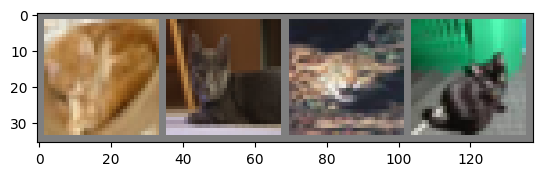

cat   cat   cat   cat  


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy() # convert to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images (cats and dogs only)
want = batch_size  # how many cat/dog images you want to display

# the classes indices for cats and dogs f
cat_idx = classes.index('cat')
dog_idx = classes.index('dog')

# lists to collect the selected images
selected_images = []
selected_labels = []


# get some training images
# trainloader is an iterable: it knows how to produce batches one after another.
# iter(trainloader) creates an iterator object, 
# which is essentially "a cursor" over the sequence of batches.
# You can think of it as: “prepare to walk through the DataLoader, batch by batch.”
dataiter = iter(trainloader)

while len(selected_images) < want:
    images, labels = next(dataiter)  # pull the next batch from the loader
    mask = (labels == cat_idx) | (labels == dog_idx)

    if mask.any():
        selected_images.append(images[mask])
        selected_labels.append(labels[mask])

# concatenate what we collected and trim to exactly "want"
images = torch.cat(selected_images, dim=0)[:want]
labels = torch.cat(selected_labels, dim=0)[:want]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F # gives you stateless functions (no stored parameters) such as F.relu, F.softmax, etc. 
# You can apply these in forward without defining them as layers.


# You define a new model class Net that inherits from nn.Module.
# In PyTorch, any trainable model is typically a subclass of nn.Module.
class Net(nn.Module):
    def __init__(self): # __init__ is called when you create Net().
        super().__init__() #  initializes the base nn.Module machinery: parameter registration, submodule tracking, etc. Without this, PyTorch won’t properly find your layers/parameters.
        self.conv1 = nn.Conv2d(3, 6, 5) # Creates a 2D convolution layer with in_channels=3, out_channels=6, kernel_size=5. learns 6 filters, each looking at 5x5 patches across the 3 channels.
        self.pool = nn.MaxPool2d(2, 2) # Defines max pooling with kernel_size=2 and stride=2. Pooling halves height and width (for even sizes).
        self.conv2 = nn.Conv2d(6, 16, 5) # Another convolution: in_channels=6, out_channels=16, kernel_size=5. It expects 6 input channels (because conv1 outputs 6 channels).
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # A linear layer mapping from 400 features to 120.
        self.fc2 = nn.Linear(120, 84) # Linear layer mapping 120 → 84.
        self.fc3 = nn.Linear(84, 2) # self.fc3 = nn.Linear(84, 2)
    # forward defines the computation performed when you call net(x).
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 	self.conv1(x): (N, 3, 32, 32) → (N, 6, 28, 28), F.relu(...): applies ReLU elementwise, same shape (N, 6, 28, 28) and then self.pool(...): max pool 2×2 stride 2, (N, 6, 28, 28) → (N, 6, 14, 14) 
        x = self.pool(F.relu(self.conv2(x))) # 	self.conv2(x): (N, 6, 14, 14) → (N, 16, 10, 10) and then self.pool(...): (N, 16, 10, 10) → (N, 16, 5, 5)
        x = torch.flatten(x, 1) # flatten all dimensions except batch, converts (N, 16, 5, 5) into (N, 400).
        x = F.relu(self.fc1(x)) # self.fc1: (N, 400) → (N, 120)
        x = F.relu(self.fc2(x)) # self.fc3: (N, 84) → (N, 2)
        x = self.fc3(x) # No activation is applied at the end. The output is a batch of 2-dimensional logits.
        return x

We will use the cross-entropy loss and "stochastic" gradient descent (SDG) with momentum.

Let's train the network! First let's make sure we are only using cats and dogs in our samples:

In [11]:
import torch
import torchvision
from torch.utils.data import DataLoader, Subset
import torch.optim as optim

# optionally use mps if on a mac
#device = torch.device('mps' if torch.mps.is_available() else 'cpu')
device = torch.device('cpu')
print('running on', device)

# create the network from the class:
net = Net()
net = net.to(device)

# use the cross-entropy loss and "stochastic" gradient descent (SDG) with momentum.
# make sure this is created AFTER creation of the net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# CIFAR-10 labels
CAT, DOG = 3, 5

# Load full CIFAR-10 again
train_full = torchvision.datasets.CIFAR10(root="./data", train=True,
                                          download=True, transform=transform)
test_full  = torchvision.datasets.CIFAR10(root="./data", train=False,
                                          download=True, transform=transform)

# Keep only cats and dogs (Subset)
train_idx = [i for i, y in enumerate(train_full.targets) if y in (CAT, DOG)]
test_idx  = [i for i, y in enumerate(test_full.targets) if y in (CAT, DOG)]

trainset = Subset(train_full, train_idx)
testset  = Subset(test_full,  test_idx)

# DataLoaders
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True,  num_workers=2)
testloader  = DataLoader(testset,  batch_size=batch_size, shuffle=False, num_workers=2)

# class names for printing
binary_classes = ("cat", "dog")

nepochs=20
for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # convert labels to 1 (dog) or 0 (cat)
        labels = (labels == DOG).long()
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

running on cpu


/opt/homebrew/lib/python3.11/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


[1,  2000] loss: 0.689


[2,  2000] loss: 0.655


KeyboardInterrupt: 

Let's save the network:

In [136]:
torch.save(net.state_dict(),'./cifar_net.pth')

Now let's test how well the network has learned! 

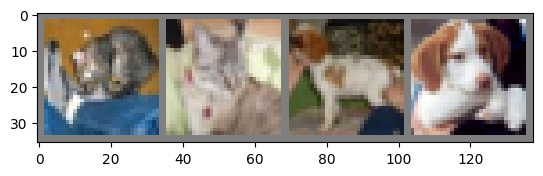

GroundTruth:  cat   cat   dog   dog  


<All keys matched successfully>

In [137]:
# display some images
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# and load the network:
net = Net()
net.load_state_dict(torch.load('./cifar_net.pth', weights_only=True))

Let's see what the neural network thinks these examples above are.

The outputs are energies for the two classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [138]:
CAT, DOG = 3, 5
binary_classes = ('cat', 'dog')

# apply the CNN:
outputs = net(images)
predicted = outputs.argmax(dim=1)

# if labels are still 3/5, map to 0/1 for display:
labels01 = (labels == DOG).long()

print('Predicted: ', ' '.join(binary_classes[predicted[j].item()]
                              for j in range(min(4, predicted.size(0)))))
print('Actual:    ', ' '.join(binary_classes[labels01[j].item()]
                              for j in range(min(4, labels01.size(0)))))

Predicted:  cat cat dog dog
Actual:     cat cat dog dog


In [139]:
CAT, DOG = 3, 5
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        labels = (labels == DOG).long()       # cat->0, dog->1
        outputs = net(images)                 # (B, 2)
        predicted = outputs.argmax(dim=1)     # (B,) in {0,1}
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the cat/dog test set: {100.0 * correct / total:.2f}%')

Accuracy on the cat/dog test set: 72.85%
